<a href="https://colab.research.google.com/github/Richish/deep_learning_with_python/blob/master/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data


In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets)=boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [ ]:
print(train_data.shape, test_data.shape)
print(train_targets.shape, test_targets.shape)
print(type(train_data), type(train_targets))

(404, 13) (102, 13)
(404,) (102,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#print(train_targets)
print(train_targets.min(), train_targets.max(), train_targets.mean())

5.0 50.0 22.395049504950492


# Data Normalization(Feature normalization)

In [ ]:
# find mean of each feature in train data
mean=train_data.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [ ]:
#std deviation of each feature in train data
std=train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [ ]:
# normalized train data: subtract mean and divide by std dev.
train_data -= mean
train_data /= std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
# normalized test data: test data is also normalized by using same mean and std dev as test.
# It must always be same cannot normalize using different values/factors for test data as that will be wrong.
test_data -= mean
test_data /= std
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

# Build the model/network

In [ ]:
from keras import layers, models

def build_model():
  """
  function builds the model, compiles the model and returns that model
  """
  
  layer_1= layers.Dense(units=64, activation="relu", input_shape=(train_data.shape[1],))
  layer_2= layers.Dense(units=64, activation="relu")
  layer_3=layers.Dense(units=1) # single unit and no activation in end layer for logistic regression
  # since activation function constraints the output of the layer.
  model=models.Sequential(layers=[layer_1,layer_2, layer_3])
  model.compile(optimizer="rmsprop", loss="mse",metrics=["mae"])
  # mae is mean absolute error- it is absolute difference between predictions and target
  return model

# k-fold validation


In [ ]:
# since the training examples are very less, if we split data in a straightforward way into cross validation and training set.
# the loss in each iteration will depend largely on what portion of data was in cv set.
# to avoid this we use k-fold cross validation.
# Here we divide the data into 'k'(usually 4-5) partitions(folds).
# In each iteration we take iterate with taking 1 partition as cv set and remaining k-1 partitions as training set.
# hence in each epoch, we actually do 'k' iterations.
# and for each epoch we take average loss for such calculations



In [ ]:
import numpy as np
k=4
num_epochs=100
fold_samples_count=len(train_data)//k # training samples in each fold
print(fold_samples_count)
all_scores=[]
for i in range(k):
  # for each fold
  print("processing fold# {}".format(i))
  # cv set
  val_data=train_data[i*fold_samples_count:(i+1)*fold_samples_count]
  val_targets=train_targets[i*fold_samples_count:(i+1)*fold_samples_count]
  # partial train set
  partial_train_data=np.concatenate([train_data[:i*fold_samples_count], train_data[(i+1) * fold_samples_count:]], axis=0)
  
  partial_train_targets=np.concatenate((train_targets[:i*fold_samples_count],
                                    train_targets[(i+1)*fold_samples_count:]), axis=0)
  model=build_model()
  model.fit(x=partial_train_data, y=partial_train_targets, epochs=num_epochs,batch_size=1,verbose=0)

  # evaluate the model on cv set
  mse, mae = model.evaluate(x=val_data, y=val_targets, verbose=0)
  print(mse, mae)
  all_scores.append(mae)
  
  

101
processing fold# 0












9.270633215951447 2.120475185979711
processing fold# 1
10.845404011188167 2.6205178038908703
processing fold# 2
18.810379321032233 2.816401743652797
processing fold# 3
12.821828315753748 2.4607781124587107


In [ ]:
print(all_scores)
print(np.mean(all_scores))

[2.120475185979711, 2.6205178038908703, 2.816401743652797, 2.4607781124587107]
2.5045432114955224


# Creating history object

In [ ]:
k=4
num_epochs=500
fold_samples_count=len(train_data)//k # training samples in each fold
print(fold_samples_count)
all_mae_histories=[]

for i in range(k):
  print("processing k= {}".format(i))
  cv_data=train_data[i*fold_samples_count:(i+1)*fold_samples_count]
  cv_targets=train_targets[i*fold_samples_count:(i+1)*fold_samples_count]
  #get part train data
  part_train_data=np.concatenate([train_data[:i*fold_samples_count], train_data[(i+1)*fold_samples_count:]], axis=0)
  part_train_targets=np.concatenate([train_targets[:i*fold_samples_count], train_targets[(i+1)*fold_samples_count:]], axis=0)

  # build model
  model=build_model()
  history=model.fit(x=part_train_data, y=partial_train_targets, batch_size=20, epochs=num_epochs, verbose=0, validation_data=(cv_data, cv_targets), use_multiprocessing=False)
  print(history.history.keys())
  mae_history=history.history["val_mean_absolute_error"]
  all_mae_histories.append(mae_history)

101
processing k= 0
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing k= 1
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing k= 2
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing k= 3
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


In [ ]:
all_mae_histories[0]
len(all_mae_histories)

4

# Mean k-fold validation scores


In [ ]:
mean_mae_histories=np.mean(all_mae_histories, axis=0)
mean_mae_histories

array([19.91100913, 17.21820099, 14.052949  , 10.94545154,  8.65613312,
        7.08376024,  5.99345895,  5.50845631,  5.26665242,  5.17013444,
        4.98641549,  4.88542988,  4.89191432,  4.94703403,  4.85409978,
        4.90553923,  4.85108393,  4.82020093,  4.83880535,  4.79908476,
        4.63999781,  4.68375015,  4.72630482,  4.77563344,  4.52803127,
        4.7048793 ,  4.75762138,  4.67543115,  4.62343432,  4.60210934,
        4.7082274 ,  4.78880097,  4.64211069,  4.68594995,  4.73605764,
        4.77099302,  4.80554261,  4.95244934,  4.64464689,  4.56265907,
        4.59246591,  4.69794136,  4.55746168,  4.69605915,  4.60157758,
        4.66982343,  4.67149773,  4.70911906,  4.49064261,  4.6031132 ,
        4.51323657,  4.68952822,  4.60692883,  4.59230916,  4.48875177,
        4.64936486,  4.7002095 ,  4.58210793,  4.61806344,  4.68836234,
        4.61722306,  4.68212072,  4.65988027,  4.59303095,  4.72292826,
        4.55313271,  4.64614354,  4.66930262,  4.54050049,  4.70

# Plot validation scores vs epochs

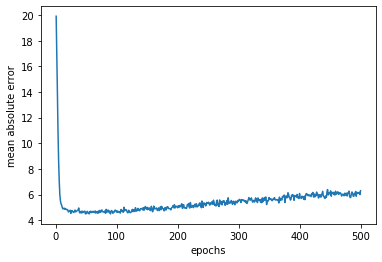

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(mean_mae_histories)+1), mean_mae_histories)
plt.xlabel("epochs")
plt.ylabel("mean absolute error")
plt.show()

# Smoothen the curve

In [ ]:
# getting plot of moving average of last points

def smooth_curve(points, factor=0.9):
  smoothened_points=[]
  for point in points:
    if smoothened_points:
      previous=smoothened_points[-1]
      smoothened_points.append(previous*factor+point*(1-factor))
    else:
      smoothened_points.append(point)
  return smoothened_points

In [ ]:
smooth_mae_history=smooth_curve(mean_mae_histories[10:])
smooth_mae_history

[4.986415485344311,
 4.976316924378423,
 4.967876663514883,
 4.965792400013102,
 4.954623138132426,
 4.949714747727767,
 4.939851666208657,
 4.927886592778579,
 4.918978468475376,
 4.906989097881385,
 4.880289968899231,
 4.860635986559923,
 4.84720286957669,
 4.840045926516925,
 4.808844460993532,
 4.798447944464972,
 4.794365288290751,
 4.78247187446377,
 4.766568119424961,
 4.750122241498249,
 4.745932757657734,
 4.750219578554123,
 4.739408690174018,
 4.734062816268137,
 4.734262298435496,
 4.737935370383374,
 4.744696094410982,
 4.765471418796972,
 4.7533889659265345,
 4.734315976810326,
 4.720130970187401,
 4.717912009631486,
 4.701866977097645,
 4.701286194769057,
 4.691315333466709,
 4.689166143057243,
 4.687399301962101,
 4.689571277318972,
 4.669678410957442,
 4.663021890138242,
 4.6480433578769755,
 4.652191843830288,
 4.647665542457217,
 4.642129904546346,
 4.62679209064421,
 4.6290493676729145,
 4.6361653811002554,
 4.630759636098274,
 4.629490016530176,
 4.635377248752698,

AttributeError: ignored

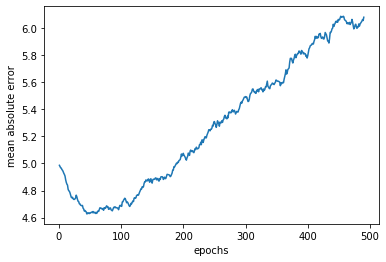

In [ ]:
plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel("epochs")
plt.ylabel("mean absolute error")
plt.Legend()
plt.show()

Therefore overfitting after 80 epochs

# Final model


In [ ]:
model=build_model()
model.fit(x=train_data, y=train_targets, epochs=80, batch_size=16, verbose=0)

In [ ]:
test_mse_score, test_mae_score=model.evaluate(x=test_data, y=test_targets)
test_mse_score, test_mae_score